In [ ]:
# https://www.youtube.com/watch?v=kz_NJERCgm8
# this program uses the Moving Average Convergence/Divergence (MACD) crossover
# to determine when to buy and sell stocks

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [3]:
# load the data
import pandas_datareader
import datetime
import pandas_datareader.data as web

# from google.colab import files
# uploaded = files.upload()
# choose files = AAPL.csv
# aapl = pd.read_csv('AAPL.csv')
# aapl = aapl.set_index(pd.DateTimeIndex(aapl.Date.values))
# aapl
start = datetime.datetime(2017, 4, 20)
end = datetime.datetime(2017, 8, 24)
aapl = web.DataReader('AAPL', 'yahoo', start, end)
aapl
# 89 rows × 6 columns

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-04-20,35.730000,35.290001,35.305000,35.610001,93278400.0,33.596832
2017-04-21,35.669998,35.462502,35.610001,35.567501,69283600.0,33.556736
2017-04-24,35.987499,35.794998,35.875000,35.910000,68537200.0,33.879871
2017-04-25,36.224998,35.967499,35.977501,36.132500,75486000.0,34.089794
2017-04-26,36.150002,35.845001,36.117500,35.919998,80164800.0,33.889301
...,...,...,...,...,...,...
2017-08-18,39.875000,39.180000,39.465000,39.375000,109712400.0,37.448807
2017-08-21,39.472500,38.777500,39.375000,39.302502,105474000.0,37.379856
2017-08-22,40.000000,39.505001,39.557499,39.945000,86418400.0,37.990917


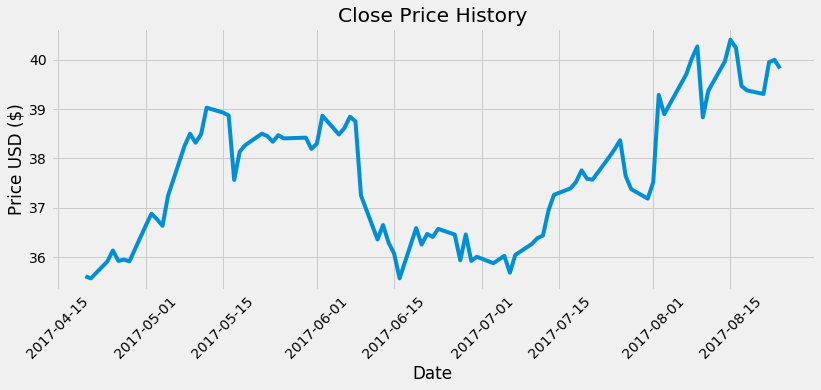

In [4]:
# visualize the stock price
plt.figure(figsize=(12.2, 4.5))
plt.plot(aapl.Close, label='Close')
plt.xticks(rotation=45)
plt.title('Close Price History')
plt.xlabel('Date')
plt.ylabel('Price USD ($)')
plt.show()

In [5]:
# calculate the short term exponential moving average (EMA)
shortEMA = aapl.Close.ewm(span=12, adjust=False).mean()
# calculate the long term exponential moving average (EMA)
longEMA = aapl.Close.ewm(span=26, adjust=False).mean()
# calculate the MACD
MACD = shortEMA - longEMA
# calculate the signal line
signal = MACD.ewm(span=9, adjust=False).mean()

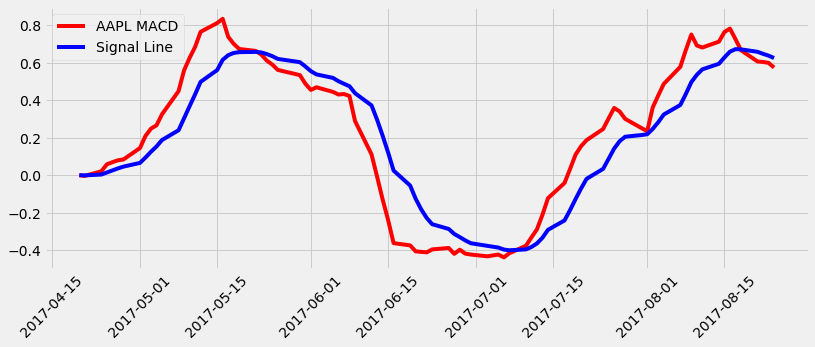

In [6]:
# plot the chart to show when MACD crosses the signal line
plt.figure(figsize=(12.2, 4.5))
plt.plot(aapl.index, MACD, label='AAPL MACD', color='red')
plt.plot(aapl.index, signal, label='Signal Line', color='blue')
plt.xticks(rotation=45)
plt.legend(loc='upper left')
plt.show()

In [7]:
# create new columns
aapl['MACD'] = MACD
aapl['Signal'] = signal
aapl

,High,Low,Open,Close,Volume,Adj Close,MACD,Signal
Date,,,,,,,,
2017-04-20,35.730000,35.290001,35.305000,35.610001,93278400.0,33.596832,0.000000,0.000000
2017-04-21,35.669998,35.462502,35.610001,35.567501,69283600.0,33.556736,-0.003390,-0.000678
2017-04-24,35.987499,35.794998,35.875000,35.910000,68537200.0,33.879871,0.021314,0.003720
2017-04-25,36.224998,35.967499,35.977501,36.132500,75486000.0,34.089794,0.058176,0.014611
2017-04-26,36.150002,35.845001,36.117500,35.919998,80164800.0,33.889301,0.069441,0.025577
...,...,...,...,...,...,...,...,...
2017-08-18,39.875000,39.180000,39.465000,39.375000,109712400.0,37.448807,0.666326,0.670928
2017-08-21,39.472500,38.777500,39.375000,39.302502,105474000.0,37.379856,0.606431,0.658028
2017-08-22,40.000000,39.505001,39.557499,39.945000,86418400.0,37.990917,0.603847,0.647192


In [8]:
# function to signal when to buy and sell
def trade(signal):
    buys = []
    sells = []
    flag = -1
    
    for i in range(0, len(signal)):
        if signal.MACD[i] > signal.Signal[i]:
            sells.append(np.nan)
            if flag != 1:
                buys.append(signal.Close[i])
                flag = 1
            else:
                buys.append(np.nan)
        elif signal.MACD[i] < signal.Signal[i]:
            buys.append(np.nan)
            if flag != 0:
                sells.append(signal.Close[i])
                flag = 0
            else:
                sells.append(np.nan)
        else:
            buys.append(np.nan)
            sells.append(np.nan)
            
    return (buys, sells)

In [9]:
# create buy and sell columns
trades = trade(aapl)
aapl['Buy'] = trades[0]
aapl['Sell'] = trades[1]
aapl

,High,Low,Open,Close,Volume,Adj Close,MACD,Signal,Buy,Sell
Date,,,,,,,,,,
2017-04-20,35.730000,35.290001,35.305000,35.610001,93278400.0,33.596832,0.000000,0.000000,NaN,NaN
2017-04-21,35.669998,35.462502,35.610001,35.567501,69283600.0,33.556736,-0.003390,-0.000678,NaN,35.567501
2017-04-24,35.987499,35.794998,35.875000,35.910000,68537200.0,33.879871,0.021314,0.003720,35.91,NaN
2017-04-25,36.224998,35.967499,35.977501,36.132500,75486000.0,34.089794,0.058176,0.014611,NaN,NaN
2017-04-26,36.150002,35.845001,36.117500,35.919998,80164800.0,33.889301,0.069441,0.025577,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2017-08-18,39.875000,39.180000,39.465000,39.375000,109712400.0,37.448807,0.666326,0.670928,NaN,39.375000
2017-08-21,39.472500,38.777500,39.375000,39.302502,105474000.0,37.379856,0.606431,0.658028,NaN,NaN
2017-08-22,40.000000,39.505001,39.557499,39.945000,86418400.0,37.990917,0.603847,0.647192,NaN,NaN


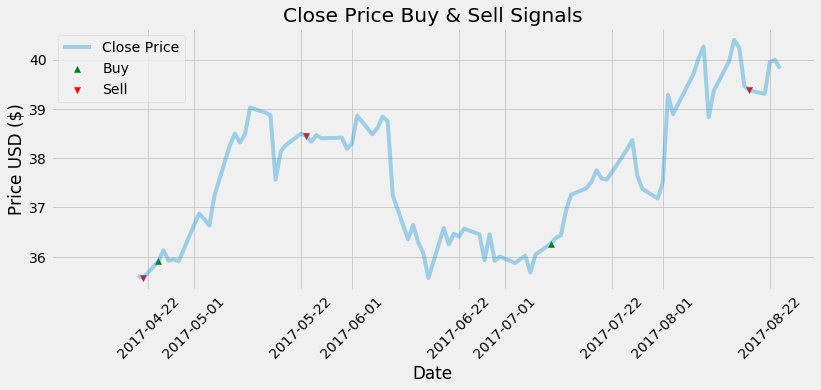

In [11]:
#visualize the buy and sell signals
plt.figure(figsize=(12.2, 4.5))
plt.scatter(aapl.index, aapl.Buy, color='green', label='Buy', marker='^', alpha=1)
plt.scatter(aapl.index, aapl.Sell, color='red', label='Sell', marker='v', alpha=1)
plt.plot(aapl.Close, label='Close Price', alpha=0.35)
plt.title('Close Price Buy & Sell Signals')
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Price USD ($)')
plt.legend(loc='upper left')
plt.show()